In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
train = pd.read_csv('train.csv')

In [66]:
test = pd.read_csv('test.csv')

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest

## Create Functions to determine top words associated with each type of image

In [68]:
# Get top n tfidf values in row and return them with their corresponding feature names.
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [69]:
# Top tfidf features in specific document (matrix row)
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [70]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [71]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [72]:
#!pip install nltk
import nltk
#nltk.download('vader_lexicon')
#nltk.download('stopwords')

### Create a list of stop words to ignore

In [73]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.extend('doom animal crossing doomguy bethesda id'.split())

In [74]:
train.head()

,Unnamed: 0,index,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename
0,1148,699,AnimalCrossing,fwoh0n,Oh no he has discovered my shrine!,12239,0,0.99,1,142,1.586280e+09,https://i.redd.it/q5v956sajfr41.jpg,q5v956sajfr41.jpg
1,1337,22,Doom,gh5puq,Not sure if this has been made before but...,12507,0,0.97,1,103,1.589132e+09,https://i.redd.it/g0ffa5l44zx41.jpg,g0ffa5l44zx41.jpg
2,1443,218,AnimalCrossing,6564aw,"Hope you guys haven't seen this before, I thou...",28240,0,0.91,0,679,1.492097e+09,https://i.redd.it/qavfy00f8cry.jpg,qavfy00f8cry.jpg
3,868,127,AnimalCrossing,g5681m,I recently found out that everybody hates Rodn...,37861,0,0.94,6,726,1.587434e+09,https://i.imgur.com/GP2Izrk.jpg,GP2Izrk.jpg
4,1355,768,Doom,fnh8er,Rip and Tear,2533,0,1.00,0,88,1.584956e+09,https://i.redd.it/c79oubyo5eo41.jpg,c79oubyo5eo41.jpg


### Create the vectorizer to analyse the text

In [75]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word',stop_words= set(stop))

### Create the vector that reads the text on the image

In [76]:
tfidf_vector = tfidf_vectorizer.fit_transform(train['title'])
tfidf_vector

<1277x2572 sparse matrix of type '<class 'numpy.float64'>'
	with 5839 stored elements in Compressed Sparse Row format>

### Convert the vector into a Data Frame with all the words as features

In [77]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_df

,000,03,10,100,10000,100k,101,11,1100,1176,...,yum,yup,zen,zieguy,zombie,zombies,zoo,zucker,ａｅｓｔｈｅｔｉｃ,ｃｒｏｓｓｉｎｇ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fine the top 15 words associated with each image. We can make those words into features and take the vector values from the selected words as new data points for our model.

In [78]:
dfs = top_feats_by_class(tfidf_vector,train['subreddit'],tfidf_vectorizer.get_feature_names(),top_n=15)

In [79]:
import matplotlib.pyplot as plt

# Plot the data frames returned by the function plot_tfidf_classfeats().
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(30, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=25)
        ax.set_title("label = " + str(df.label), fontsize=30)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#005035')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature,fontsize=20)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

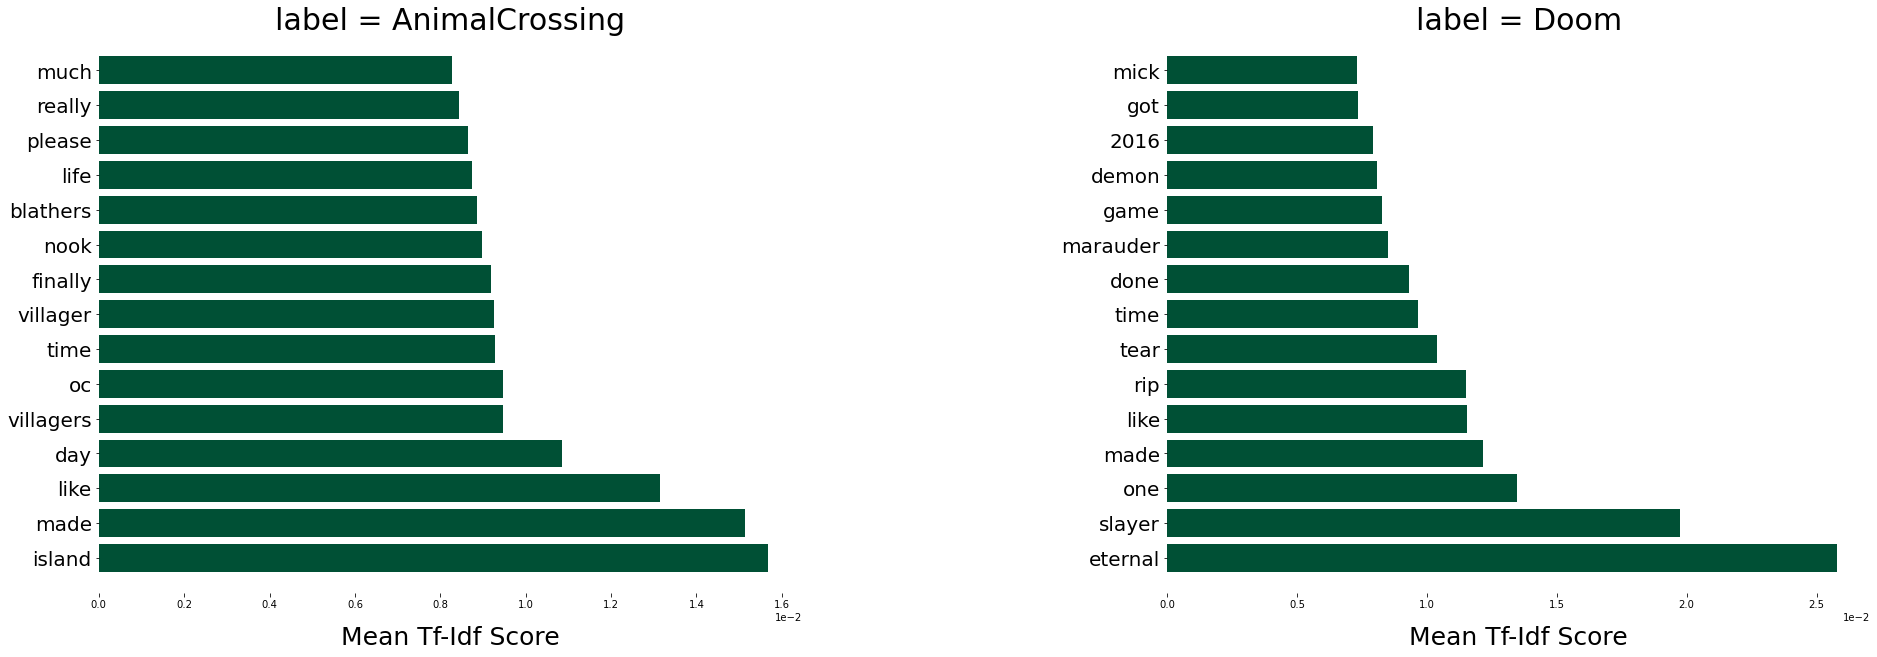

In [80]:
plot_tfidf_classfeats_h(dfs)

### Add the selected words as features in our training data for the model

In [81]:
train[['much','really','please','life','blathers','nook','finally','villager','time','oc','villagers','day','like','made','island','mick','got','2016','demon','game','marauder','done','tear','rip','one','slayer','eternal']] = tfidf_df[['much','really','please','life','blathers','nook','finally','villager','time','oc','villagers','day','like','made','island','mick','got','2016','demon','game','marauder','done','tear','rip','one','slayer','eternal']]

In [41]:
train.head()

,Unnamed: 0,index,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,...,like,made,island,marauder,done,tear,rip,one,slayer,eternal
0,1148,699,AnimalCrossing,fwoh0n,Oh no he has discovered my shrine!,12239,0,0.99,1,142,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
1,1337,22,Doom,gh5puq,Not sure if this has been made before but...,12507,0,0.97,1,103,...,0.0,0.554008,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
2,1443,218,AnimalCrossing,6564aw,"Hope you guys haven't seen this before, I thou...",28240,0,0.91,0,679,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
3,868,127,AnimalCrossing,g5681m,I recently found out that everybody hates Rodn...,37861,0,0.94,6,726,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
4,1355,768,Doom,fnh8er,Rip and Tear,2533,0,1.00,0,88,...,0.0,0.000000,0.0,0.0,0.0,0.71131,0.702879,0.0,0.0,0.0


### Repeat the methodology for the testing set

In [82]:
tfidf_vector2 = tfidf_vectorizer.fit_transform(test['title'])
tfidf_vector2

<320x994 sparse matrix of type '<class 'numpy.float64'>'
	with 1525 stored elements in Compressed Sparse Row format>

In [83]:
tfidf_df2 = pd.DataFrame(tfidf_vector2.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_df2

,000,10,100,10000,1665,19,20,200,2014,2016,...,yeah,years,yeet,yes,yesterday,yet,zen,zombies,zoo,ウーフ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
test[['much','really','please','life','blathers','nook','finally','villager','time','oc','villagers','day','like','made','island','mick','got','2016','demon','game','marauder','done','tear','rip','one','slayer','eternal']] = tfidf_df2[['much','really','please','life','blathers','nook','finally','villager','time','oc','villagers','day','like','made','island','mick','got','2016','demon','game','marauder','done','tear','rip','one','slayer','eternal']]

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [86]:
x_train = train[['nook','finally','villager','time','oc','villagers','day','like','made','island','marauder','done','tear','rip','one','slayer','eternal']]
y_train = train['subreddit']

In [87]:
x_test = test[['nook','finally','villager','time','oc','villagers','day','like','made','island','marauder','done','tear','rip','one','slayer','eternal']]
y_test = test['subreddit']

In [113]:
rf01 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(x_train,y_train)
prediction_rf01 = rf01.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, prediction_rf01))
print('Confusion Matrix')
print(confusion_matrix(y_test, prediction_rf01))
# Accuracy score
print('accuracy is',accuracy_score(prediction_rf01,y_test))

test_predictions_proba = rf01.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

                precision    recall  f1-score   support

AnimalCrossing       0.89      0.26      0.40       151
          Doom       0.59      0.97      0.74       169

      accuracy                           0.63       320
     macro avg       0.74      0.61      0.57       320
  weighted avg       0.73      0.63      0.58       320

Confusion Matrix
[[ 39 112]
 [  5 164]]
accuracy is 0.634375
Log Loss: 0.7177


In [89]:
nb = MultinomialNB().fit(x_train,y_train)
nb_predict = nb.predict(x_test)


print(classification_report(y_test, nb_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, nb_predict))

print('accuracy is',accuracy_score(nb_predict,y_test))

test_predictions_proba = nb.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

                precision    recall  f1-score   support

AnimalCrossing       0.77      0.22      0.34       151
          Doom       0.57      0.94      0.71       169

      accuracy                           0.60       320
     macro avg       0.67      0.58      0.53       320
  weighted avg       0.67      0.60      0.54       320

Confusion Matrix
[[ 33 118]
 [ 10 159]]
accuracy is 0.6
Log Loss: 0.642


In [90]:
kn = KNeighborsClassifier().fit(x_train,y_train)
kn_predict = kn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, kn_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, kn_predict))
# Accuracy score
print('accuracy is',accuracy_score(kn_predict,y_test))

test_predictions_proba = kn.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

                precision    recall  f1-score   support

AnimalCrossing       0.82      0.27      0.41       151
          Doom       0.59      0.95      0.73       169

      accuracy                           0.63       320
     macro avg       0.71      0.61      0.57       320
  weighted avg       0.70      0.63      0.58       320

Confusion Matrix
[[ 41 110]
 [  9 160]]
accuracy is 0.628125
Log Loss: 0.7928


In [91]:
sv = svm.SVC().fit(x_train,y_train)
sv_predict = sv.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, sv_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, sv_predict))
# Accuracy score
print('accuracy is',accuracy_score(sv_predict,y_test))

#test_predictions_proba = sv.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

                precision    recall  f1-score   support

AnimalCrossing       0.84      0.25      0.39       151
          Doom       0.59      0.96      0.73       169

      accuracy                           0.62       320
     macro avg       0.72      0.61      0.56       320
  weighted avg       0.71      0.62      0.57       320

Confusion Matrix
[[ 38 113]
 [  7 162]]
accuracy is 0.625
Log Loss: 0.7928


In [111]:
logi = LogisticRegression().fit(x_train,y_train)
logi_predict = logi.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, logi_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, logi_predict))
# Accuracy score
print('accuracy is',accuracy_score(logi_predict,y_test))

#test_predictions_proba = sv.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

                precision    recall  f1-score   support

AnimalCrossing       0.80      0.27      0.41       151
          Doom       0.59      0.94      0.73       169

      accuracy                           0.62       320
     macro avg       0.70      0.61      0.57       320
  weighted avg       0.69      0.62      0.57       320

Confusion Matrix
[[ 41 110]
 [ 10 159]]
accuracy is 0.625
Log Loss: 0.7153


## Random Forest is the best so we can Hyper-Parameter tune that one

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Tuning Number of Estimators

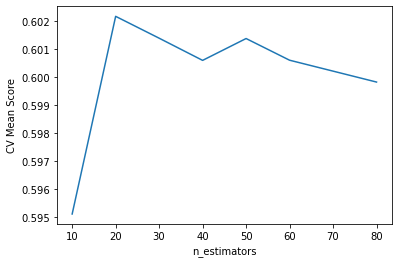

In [117]:
estimators = [10,20,30,40,50,60,80]

scores = []
for estimator in estimators:
    #Create random forest model
    rf = RandomForestClassifier(n_estimators = estimator).fit(x_train,y_train)
    #Evaluate with k-fold cv
    rf_cv_scores = cross_val_score(rf, x_train , y_train, cv=KFold(n_splits=10, random_state=1, shuffle=True))
    scores.append(rf_cv_scores.mean())

plt.plot(estimators, scores)
plt.ylabel('CV Mean Score')
plt.xlabel('n_estimators')
plt.show()

### Tuning for Split Criteria

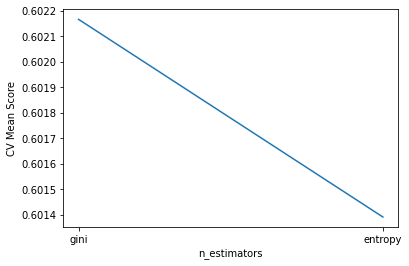

In [118]:
criteria = ['gini','entropy']

scores = []
for i in criteria:
    #Create random forest model
    rf = RandomForestClassifier(n_estimators = 20, criterion=i).fit(x_train,y_train)
    #Evaluate with k-fold cv
    rf_cv_scores = cross_val_score(rf, x_train , y_train, cv=KFold(n_splits=10, random_state=1, shuffle=True))
    scores.append(rf_cv_scores.mean())

plt.plot(criteria, scores)
plt.ylabel('CV Mean Score')
plt.xlabel('n_estimators')
plt.show()

# Final Model

In [120]:
rf01 = RandomForestClassifier(n_estimators = 20,criterion="gini").fit(x_train,y_train)
prediction_rf01 = rf01.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, prediction_rf01))
print('Confusion Matrix')
print(confusion_matrix(y_test, prediction_rf01))
# Accuracy score
print('accuracy is',accuracy_score(prediction_rf01,y_test))

test_predictions_proba = rf01.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

                precision    recall  f1-score   support

AnimalCrossing       0.87      0.26      0.40       151
          Doom       0.59      0.96      0.73       169

      accuracy                           0.63       320
     macro avg       0.73      0.61      0.57       320
  weighted avg       0.72      0.63      0.58       320

Confusion Matrix
[[ 39 112]
 [  6 163]]
accuracy is 0.63125
Log Loss: 0.9156
